# Feature extraction

In this notebook, you will create an instance segmentation of biological data and extract quantitiative features from this data with the [`regionprops_table()` function](https://scikit-image.org/docs/dev/api/skimage.measure#skimage.measure.regionprops_table) from scikit-image.

In [1]:
from skimage import data, filters, measure
import pandas as pd
import matplotlib.pyplot as plt

## Different types of features

As shown in the lecture, features can be grouped in a few general types. Many features tyically belong to one of the following:

- Intensity-based features: These are based on the image intensity values in selected areas of interest
- Shape-based features: These describe the general shape of an object and can be measured independ of the original intensity values
- Spatial features: These features typically take into account not only the object itself but also its location in the image or with reference to other objects.

## Working with dictionaries

Measured features of an image are essentially tabular data, which can be handled very efficiently in Python. Tabular data for typical labelled image data looks like this:

| Label | feature 1 | feature 2 |
| --- | --- | --- |
| 1 | some value |some value |
| 2 | some value |some value |
| 3 | some value |some value |
...

*Remember*: Labelled images with multiple occurrences of the same type of objects (e.g., cells or nuclei) are the result of an *instance segmentation* task, whereas a unique label is assigned to every object.

[Dictionaries in Python](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) typically have a `key`-`value` structure and can be created and accessed like this:

In [2]:
data1 = [1, 2, 3]
data2 = ['Monday', 'Tuesday', 'Wednesday']
my_dict = {'numbers': data1,
          'days': data2}
my_dict

{'numbers': [1, 2, 3], 'days': ['Monday', 'Tuesday', 'Wednesday']}

In [3]:
my_dict['days']

['Monday', 'Tuesday', 'Wednesday']

In [4]:
my_dict.keys()

dict_keys(['numbers', 'days'])

The [Pandas](https://pandas.pydata.org/) library provides a great amount of useful functions to work with tabular data. The pandas-equivalent of a dictionary is called a `DataFrame` and can be created from a dictionary by simple means:

In [5]:
df = pd.DataFrame(my_dict)
df

,numbers,days
0,1,Monday
1,2,Tuesday
2,3,Wednesday


Accessing the data works just like with dictionaries:

In [6]:
df['days']

0       Monday
1      Tuesday
2    Wednesday
Name: days, dtype: object

## Exercises

First, let's get some sample data from scikit-image:

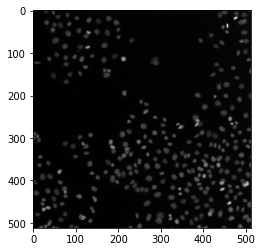

In [7]:
image = data.human_mitosis()
plt.imshow(image, cmap='gray')

## Exercise 1

Apply Otsu-thresholding to the image to create a binary image and then create a label image from the binary image:

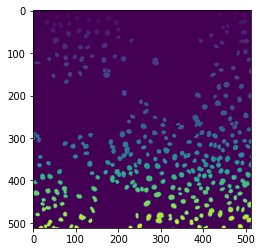

In [8]:
threshold = filters.threshold_otsu(image)
binary = image > threshold
plt.imshow(binary, cmap='gray')

label_image = measure.label(binary)
plt.imshow(label_image)
plt.show()

## Exercise 2

Use the `measure.regionprops_table` function to measure the area and the mean intensity for every object.

*Hint*: You can create a list of measurements to be passed to `regionprops_table` like this: `properties = ['property1', 'property2', ...]`. You find a list of all possible properties [here](https://scikit-image.org/docs/dev/api/skimage.measure#skimage.measure.regionprops).

In [9]:
results = measure.regionprops_table(label_image)

## Exercise 3

The `results` variable now contains the derived measurements from the input data and is of type `dict`. 

- Use the `dictionary.keys()` command to print all columns in the results variable to the notebook.
- Remember, Python dictionaries can be accessed like this: `value = dictionary[key]`. Use this this to print all area measurements from `results` to this notebook!

In [10]:
print(results.keys())

for key in results:
    print(results[key])

dict_keys(['label', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3'])
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 23

## Exercise 4

When we obtain measurements from image data, we usually want to visualize them and do some statistical evaluation. You have already learned to plot histograms with matplotlib - use this to visualize the distribution of areas in the image data as a histogram!

*Hint:* You can retrieve the `area` measurements from the results as described above.

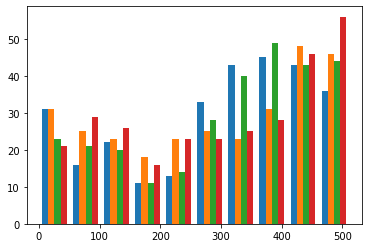

In [11]:
array = []
for key in results:
    if key != "label":
        array.append(results[key])

plt.hist(array)
plt.show()

## Exercise 5

Lastly, calculate a mean and standard deviation of the areas of all objects in the image. In order to do so, you need to 

- retrieve the measurements from the `results` dataframe as described above
- Convert it to a numpy array with np.asarray()
- Calculate and print the mean and the standard deviation from the results

*Hint*: Numpy arrays have some convenience functions attached to them (e.g., `some_array.function()`) attached to them - see if you can find out the functions for the mean and standard deviation!

In [12]:
import numpy as np

for key in results:
    array = np.asarray(results[key])
    print(key + ":")
    print("mean: %4.4f" % (array.mean()))
    print("standard devation: %4.4f \n" % (array.std()))

label:
mean: 147.0000
standard devation: 84.5813 

bbox-0:
mean: 296.3072
standard devation: 148.9180 

bbox-1:
mean: 286.7986
standard devation: 159.0004 

bbox-2:
mean: 307.8464
standard devation: 149.1392 

bbox-3:
mean: 298.4164
standard devation: 158.7883 

